# Project: Investigate a "No show" appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be analyzing data associated with show / no show of patients in medical appointments for a hospital located in Brazil. In particular, we are interested in finding trends and relationships between the event of a patient's success of failure to attend a scheduled appointment and factors such as gender, appointment location, welfare program enrollment, patient's health (hypertension, diabetes, alcoholism and handicap) and appointment confirmation via SMS.

The data used has been obtained from Kaggle for medical appointments over the period April 29th, 2016 to June 8th, 2016 accumulated for more than 100 thousand appointments. The data file is composed of 14 columns as follows:
1- PatientId: the unique identification number assigned to each patient.
2- AppointmentID: the identification number assigned to each appointment
3- Gender: sex of patient (male or female)
4- ScheduledDay: the day the patient called to register the appointment (before the appointment itself)
5- AppointmentDay: the day of the actual medical examination of the patient (when the patient has to show up)
6- Age: patient's age
7- Neighbourhood:place of medical appointment
8- Scholarship:whether or not the patient is subscribed in the Brasilian welfare program Bolsa Familia (0=not subscribed, 1=subscribed)
9- Hipertension: whether or not the patient has hypertension (0=no hypertension, 1=hypertension)
10- Diabetes: whether or not the patient is diabetic (0=not diabetic, 1=diabetic)
11- Alcoholism: whether or not the patient is alcoholicic (0=not alcoholic, 1=alcoholic)
12- Handcap: the number of disabilities of the patient (0=no disabilities, number of disabilities range from 1-4)
13- SMS_received:whether or not the patient reeived confirmation SMS for the appointment (0=did not receive, 1=received)
14- No-show: whether or not the patient showed up on the appointment day (No=show, Yes=no show)


### Question(s) for Analysis
1- Does the age of a patient affect showing up for appointments?
In this respect, we aim to gauge the presence of relationships between the age variable and a number of variables, namely a)whether age of the patient affects the show / no-show rate. b)we will be segmenting the age variable into age brackets to test the effect that each subclass individually might have on the no-show rate. c) whether the age of patient and the day of the week have an effect on the no-show rate. d)whether age and scholarship have an effect on no-show rate. e) whether age and a number of health condition scenarios for the patient (disabilities, hypertension, diabetes and alcoholism) affect the no-show rate.

2- Does the gender affect the show up rate for the appointments?
We aim to examine whether being a male or female patient affects the show up rate for the medical appointments. In addition, we aim to examine 2 additional scenarios under the gender title: a)whether being a male / female patient and being enrolled in the welfare program (scholarship) affects the show up rate for appointments and b)whether being a male / female patient and receiving a confirmation SMS affects the show up rate for appointments.

3-  Does the time period between scheduling an appointment and actual appointment day (lead time) affect the patients' show/no-show rate?
In other words, we seek to address the question of does recently booked appointments have a higher or lower miss rate than older appointments. In our endeavors to address this question, we aim to test the relationship between: a)lead time and show / no- show rates, b)lead time, patients whom booked 2 appointments and show rate, c)lead time, confirmation SMS and show rate and finally d) lead time (presented in the form of time intervals for easier detection of subclasses trends), age and show rates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


-A typo appears in the column labelled "Hipertension" that would be changed to "Hypertenstion" in the data cleaning section.
-For convenience, the column headings would be changed to all lowercases in the data cleaning section.

In [4]:
df.shape

(110527, 14)

The dataset has 110527 rows and 14 columns

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


-The average patients' age is 37 years. Most patients' ages fall between 18-55 years, although there is an outlier patient aged 115 years. The minimum age is -1, which appears to be an incorrect input that needs further investigation.
-Only about 10% of the patients are enrolled in the Brasilian welfare program (Bolsa Familia)
-Out of the 3 health issues (hypertension, diabetes and alcoholism) inspected by the dataset, hypertension appears to be a relatively common health issue affecting about 20% of patients, followed by diabetes (about 7%) and finally by the least common health issue of alcoholism (affecting around 3% of patients).
-With regards to the "Handcap" column, we might be tempted to conclude that the maximum value of 4 is incorrect, given that the dataset description on Kaggle states that it is a true or false column. However, further investigation on the issue has yielded that a correction note was issued by the dataset creator explanining that the "Handcap" column can take values between 0 to 4 depending on the number of disabilities of the patient. Hence, we would stick to the dataset creator's updated definition of the column, and would assume that the number "4" is a valid input.
-Roughly one third of the patients received an SMS message from the hospital regarding the appointment date.

In [6]:
# Check data type of each column and presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


-There appears to be no missing data, with the number of rows being 110527 rows.
-PatientId datatype is float64, which implies that there might be possible incorrect patients' IDs recorded as decimals. We would change the datatype for patientsID to string (object) in the Data Cleaning section.
-The datatype of both "ScheduledDay" and "AppointmentDay" columns require to be changed to datetime (to be performed in the Data Cleaning section).

In [7]:
#count duplicates in entire dataframe
df.duplicated().value_counts()

False    110527
dtype: int64

There are no duplicate rows in the dataset

In [8]:
# checks all columns for null values
df.isnull().sum().any()

False

-The dataset contains no null values

In [9]:
# count the unique values in the "HandCap" column
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

-The majority of patients had no disabilities
-As mentioed earlier, we opted to adhere to the redefinition of the "HandCap" column by the data creator, and therefore we would leave the column's values as is with no amendments.

In [10]:
df.PatientId.nunique()

62299

-Not all patients' IDs are unique, as the same patient might have called to reschedule or to book another appointment with another doctor throughout the 6 months time span covered by the dataset

In [11]:
df.AppointmentID.nunique()

110527

-There are no redundant appointment identification numbers

In [12]:
# creating a bool column to check for incorrect patients' IDs 
df['patientid_integer'] = df.PatientId.apply(lambda x: x.is_integer())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId            110527 non-null float64
AppointmentID        110527 non-null int64
Gender               110527 non-null object
ScheduledDay         110527 non-null object
AppointmentDay       110527 non-null object
Age                  110527 non-null int64
Neighbourhood        110527 non-null object
Scholarship          110527 non-null int64
Hipertension         110527 non-null int64
Diabetes             110527 non-null int64
Alcoholism           110527 non-null int64
Handcap              110527 non-null int64
SMS_received         110527 non-null int64
No-show              110527 non-null object
patientid_integer    110527 non-null bool
dtypes: bool(1), float64(1), int64(8), object(5)
memory usage: 11.9+ MB


In [14]:
# filter the bool column for bool==False
df[~df['patientid_integer']]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,patientid_integer
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No,False
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,False
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,False
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,False
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No,False


-5 patients' IDs had decimal points which might have been caused by incorrect data entry. Data cleaning is to be performed in the next section.

In [15]:
#checking "Alcoholism" column for True values for ages < 10
df[(df['Alcoholism']==1) & (df['Age']<10)][['Alcoholism','Age']]

,Alcoholism,Age
17463,1,7
32817,1,5
56008,1,7
80263,1,8
86546,1,4


-Performing a sanity check on the values of the "Alcoholism" column against the "Age" column produces 5 patients of ages 4-8 years being treated from alcoholism. While this might sound absurd, we do not have enough information to support or negate this finding.

In [16]:
# checking whether schedule days are incorrectly set on a later day than appointment day 
df[(df['ScheduledDay']>df['AppointmentDay'])][['ScheduledDay','AppointmentDay']]

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
8,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z
19,2016-04-29T10:43:14Z,2016-04-29T00:00:00Z
24,2016-04-29T14:19:19Z,2016-04-29T00:00:00Z
26,2016-04-29T14:19:42Z,2016-04-29T00:00:00Z
28,2016-04-29T15:48:02Z,2016-04-29T00:00:00Z


-The output displayed that there are 38568 rows in the dataset with the incident of the schedule date being later than the appointment date. While this might initially indicate a possible data entry inaccuracy,  a closer look at the 2 columns under investigation reveals that the "ScheduledDay" column displayes both day and time, while the "ApppointmentDay" column only displays the date with no time. Hence any same day scheduling would be automatically counted in the output as schedule day > appointment day. To get around this issue, we need to compare dates only (without the time component) between the two columns to check for possible data entry mistakes.

In [17]:
# checking for rows with duplicate values for both "PatientId" and "AppointmentDay"
(df.duplicated(subset=['PatientId','AppointmentDay'], keep=False)).value_counts()

False    94327
True     16200
dtype: int64

-The dataset has 16200 rows displaying identical "PatientId" and "AppointmentDay" values.

In [18]:
# Establishing a new column for rows with duplicate values for both "PatientId" and "AppointmentDay"
df['reschedule_or_two_appointments'] = (df.duplicated(subset=['PatientId','AppointmentDay'], keep=False))

-The output displayed that there are 16200 in the dataset with the incident of a patient's ID and appointment date were recorded twice for the same date. In this code we try to find instances where the same patient called more than one time to set the same appointment day. We could think of 2 reasons for that patient behavior; perhaps the patient was rescheduling his appointment time (and not date), or perhaps the patient was setting another appointment with another doctor during the same day. As the "AppointmentDay" column shows only the date without the time, we simply do not have enough data to take one side of the 2 arguments presented, and hence we would seek to narrow the scope of the findings in the code that follows.

In [19]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,patientid_integer,reschedule_or_two_appointments
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,True
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,True
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,True
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False


In [20]:
(df.duplicated(subset=['PatientId','AppointmentDay','ScheduledDay'], keep=False)).value_counts()

False    107918
True       2609
dtype: int64

In [21]:
df['two_appointments'] = (df.duplicated(subset=['PatientId','AppointmentDay','ScheduledDay'], keep=False))

Carrying on with further examination of the "reschedule_or_two_appointments" column, we place an additional condition, whereby the same patient ID was recorded twice regarding the same appointment day during the same schedule day call, but assigned 2 different appointment IDs. For our purposes and based on our constraint understanding of the case, we opt to assume that there is significant evidence to support the argument that this patient call was to book 2 appointments with 2 different doctors during the same day. There were 2609 appointment IDs recorded in the dataset for the possible booking of two appointments.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
PatientId                         110527 non-null float64
AppointmentID                     110527 non-null int64
Gender                            110527 non-null object
ScheduledDay                      110527 non-null object
AppointmentDay                    110527 non-null object
Age                               110527 non-null int64
Neighbourhood                     110527 non-null object
Scholarship                       110527 non-null int64
Hipertension                      110527 non-null int64
Diabetes                          110527 non-null int64
Alcoholism                        110527 non-null int64
Handcap                           110527 non-null int64
SMS_received                      110527 non-null int64
No-show                           110527 non-null object
patientid_integer                 110527 non-null bool
reschedule_or_two_appointments    110527 no

In [23]:
df['two_appointments'].dtypes

dtype('bool')

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,patientid_integer,reschedule_or_two_appointments,two_appointments
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,True,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,True,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,True,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,False,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,True,False,False


Summary of Data Assessing:
2- All column names are suggested to change to lower case for ease of reference.
3- The datatypes of "PatientId" and "AppointmentID" columns are suggested to change from float64 and int64 respectively to string.
1- Typo correction is required to change the column names  from "Hipertension" to "hypertension", "No-show" to "no_show" and "Handcap" to "handicap"
4- Change data type of "no_show" column to int
5- Change date type of "reschedule_or_two_appointments" column and "two_appointments" column from bool to int
6- The data type of both "ScheduledDay" and "AppointmentDay" columns require to be changed to datetime.
7- Normalizing both "ScheduledDay" and "AppointmentDay" columns, as there is a time component in the "scheduledday" column and none in the "appointmentday" column.
8- There is no measure of the time difference between scheduling and appointment and the actual appointment date.
9- There were rows where the "scheduledday" was recorded at a later day than "appointmentday", which might be data entry mistake.
10- The "PatientId" column displayed 5 values that were recorded as decimals and not as whole numbers as might be expected.
11- The "Age" column displayed a minimum age value of -1, which appears to be an incorrect input.
12- The "Handcap" column, which is originally defined as a true / false column by the dataset creator, displayed values greater than 1 (199 values ranging from "2" to "4"). We have opted to stick to an updated correction note by the dataset creator stating that the "Handcap" column defines the number of disabilities of the patient and can assume values between 0 to 4. Hence, no further amendments are required in this column.
13- Performing a sanity check on the values of the "Alcoholism" column against the "Age" column produces 5 patients of ages 4-8 years being treated from alcoholism.



### Data Cleaning

 

In [25]:
# Rename 3 column names after correcting typos
df.rename(columns = {'No-show' : 'no_show', 'Hipertension' : 'hypertension', 'Handcap' : 'handicap'}, inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'hypertension',
       'Diabetes', 'Alcoholism', 'handicap', 'SMS_received', 'no_show',
       'patientid_integer', 'reschedule_or_two_appointments',
       'two_appointments'],
      dtype='object')

1- Typo correction is required to change the column names from "Hipertension" to "hypertension", "No-show" to "no_show" and "Handcap" to "handicap"

In [26]:
# Change all column names to lowercase
df.columns = df.columns.str.lower()
df.head(0)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,patientid_integer,reschedule_or_two_appointments,two_appointments


2- All column names were changed to lower case for ease of reference.

In [27]:
#change dtype of "patientid" and "appointmentid" columns to object
df['patientid'] = df['patientid'].astype(str)
df['appointmentid'] = df['appointmentid'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
patientid                         110527 non-null object
appointmentid                     110527 non-null object
gender                            110527 non-null object
scheduledday                      110527 non-null object
appointmentday                    110527 non-null object
age                               110527 non-null int64
neighbourhood                     110527 non-null object
scholarship                       110527 non-null int64
hypertension                      110527 non-null int64
diabetes                          110527 non-null int64
alcoholism                        110527 non-null int64
handicap                          110527 non-null int64
sms_received                      110527 non-null int64
no_show                           110527 non-null object
patientid_integer                 110527 non-null bool
reschedule_or_two_appointments    110527 no

3-The datatypes of "patientid" and "appointmentid" columns were changed from float64 and int64 respectively to string, as no arithmetic operations are expected to be done for the aforementioned columns.

In [28]:
# change dtype of "no_show" to bool
df['no_show'] = np.where(df['no_show']!= 'No', True, False)
#change dtype of no_show column from bool to int
df['no_show'] = df['no_show'].astype(int)
df['no_show'].dtype

dtype('int64')

4- Change data type of "no_show" column to int

In [29]:
#change dtype of reschedule_or_two_appointments column and two_appointments from bool to int
df['reschedule_or_two_appointments'] = df['reschedule_or_two_appointments'].astype(int)
df['two_appointments'] = df['two_appointments'].astype(int)
df['reschedule_or_two_appointments'].dtypes

dtype('int64')

5- change datatype of "reschedule_or_two_appointments" column and "two_appointments" column from bool to int, in order to facilitate the use of both columns in the data exploration phase.

In [30]:
# convert datatype from object to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
patientid                         110527 non-null object
appointmentid                     110527 non-null object
gender                            110527 non-null object
scheduledday                      110527 non-null datetime64[ns, UTC]
appointmentday                    110527 non-null datetime64[ns, UTC]
age                               110527 non-null int64
neighbourhood                     110527 non-null object
scholarship                       110527 non-null int64
hypertension                      110527 non-null int64
diabetes                          110527 non-null int64
alcoholism                        110527 non-null int64
handicap                          110527 non-null int64
sms_received                      110527 non-null int64
no_show                           110527 non-null int64
patientid_integer                 110527 non-null bool
reschedule_or_two_

6-The datatype of both "scheduledday" and "appointmentday" columns was changed to datetime, in order to facilitate the use of both columns in the data exploration phase.

Converting the datatype of both the "scheduledday" and the "appointmentday" from object to datetime leaves us with the problem of the non uniformity between both columns; the "scheduleday" column displayed date and time, while the "appointmentday" column displayed only date without time, rendering the comparison a little problematic. We attempt to address this issue in the code that follows.

In [31]:
#convert datetime columns to just date
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.normalize()
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.normalize()
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,patientid_integer,reschedule_or_two_appointments,two_appointments
0,29872499824296.0,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,1,0
1,558997776694438.0,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,1,0


7- Normalizing both "scheduledday" and "appointmentday" columns, as there is a time component in the "scheduledday" column and none in the "appointmentday" column.

To get around the issue, we normalize the columns to show only the day of the scheduling and appointment. The time portion of the date-time is converted to midnight (00:00:00), as in our case, the time component is of less significance than the date.

In [32]:
# calculating the difference (in days) between "appointmentday" and "scheduledday"
df['lead_time'] = (df['appointmentday'] - df['scheduledday']).dt.days
df.head(10)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,patientid_integer,reschedule_or_two_appointments,two_appointments,lead_time
0,29872499824296.0,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,1,0,0
1,558997776694438.0,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,1,0,0
2,4262962299951.0,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,1,0,0
3,867951213174.0,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,0,0,0
4,8841186448183.0,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,0,0,0
5,95985133231274.0,5626772,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0,True,0,0,2
6,733688164476661.0,5630279,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1,True,0,0,2
7,3449833394123.0,5630575,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1,True,0,0,2
8,56394729949972.0,5638447,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,0,True,0,0,0
9,78124564369297.0,5629123,F,2016-04-27 00:00:00+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,0,True,0,0,2


8- There is no measure of the time difference between scheduling an appointment and the actual appointment date. We calculate a new column "lead_time" to measure the difference in days, ignoring the time (00:00:00) component.

In [33]:
# displaying rows where normalized "scheduledday" > normalized "appointmentday"
df.loc[df['lead_time'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,patientid_integer,reschedule_or_two_appointments,two_appointments,lead_time
27033,7839272661752.0,5679978,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,True,0,0,-1
55226,7896293967868.0,5715660,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,True,0,0,-1
64175,24252258389979.0,5664962,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,True,0,0,-1
71533,998231581612122.0,5686628,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,True,1,0,-6
72362,3787481966821.0,5655637,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,True,0,0,-1


9- There were rows where the "scheduledday" was recorded at a later day than "appointmentday", which might be data entry mistake.

-There were 5 incidents recorded where schedule day was on a later date than the appointment date. While in most of the cases the difference is a mere one day, leading us to believe that this might have been a possible data entry mistake whereby the columns' input was switched, however there is one observation where the schedule day is 6 days ahead of the appointment day.

In [34]:
# removing rows where normalized "scheduledday" > normalized "appointmentday"
df.drop(df.loc[(df['lead_time'] < 0)].index, inplace=True)
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 18 columns):
patientid                         110522 non-null object
appointmentid                     110522 non-null object
gender                            110522 non-null object
scheduledday                      110522 non-null datetime64[ns, UTC]
appointmentday                    110522 non-null datetime64[ns, UTC]
age                               110522 non-null int64
neighbourhood                     110522 non-null object
scholarship                       110522 non-null int64
hypertension                      110522 non-null int64
diabetes                          110522 non-null int64
alcoholism                        110522 non-null int64
handicap                          110522 non-null int64
sms_received                      110522 non-null int64
no_show                           110522 non-null int64
patientid_integer                 110522 non-null bool
reschedule_or_two_

5 rows were dropped in which normalized "scheduleday" is greater than normalized "appointmentday".

In [35]:
# remove rows where patientId has decimal points 
df.drop(df[df['patientid_integer'] == False].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110517 entries, 0 to 110526
Data columns (total 18 columns):
patientid                         110517 non-null object
appointmentid                     110517 non-null object
gender                            110517 non-null object
scheduledday                      110517 non-null datetime64[ns, UTC]
appointmentday                    110517 non-null datetime64[ns, UTC]
age                               110517 non-null int64
neighbourhood                     110517 non-null object
scholarship                       110517 non-null int64
hypertension                      110517 non-null int64
diabetes                          110517 non-null int64
alcoholism                        110517 non-null int64
handicap                          110517 non-null int64
sms_received                      110517 non-null int64
no_show                           110517 non-null int64
patientid_integer                 110517 non-null bool
reschedule_or_two_

10- The "PatientId" column displayed 5 values that were recorded as decimals and not as whole numbers as might be expected.
Drop the 5 rows where patient IDs were inaccurately recorded with decimal points.

In [36]:
# display rows where age is recorded as < 0
df[df.age<0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,patientid_integer,reschedule_or_two_appointments,two_appointments,lead_time
99832,465943158731293.0,5775010,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0,True,0,0,0


In [37]:
# replace the cell with the age record of "-1" with the mean age of the patients (37 years)
df['age'].replace({-1: df.age.mean().round(decimals=0)}, inplace=True)
df.describe().age

count    110517.000000
mean         37.089778
std          23.110062
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [38]:
#change dtype of age column from float to int
df['age'] = df['age'].astype(int)
df['age'].dtype

dtype('int64')

11- The "age" column displayed a minimum age value of -1, which appears to be an incorrect input.
For ages less than 0, only one entry was displayed, which sets the age at -1. The illogic "age" value of -1 was replaced with the mean of the age column of 37. Finally, the "age" dtype was converted to int to be more user friendly in the data exploration phase.

12- The "handicap" column, which is originally defined as a true / false column by the dataset creator, displayed values greater than 1 (199 values ranging from "2" to "4"). We have opted to stick to an updated correction note by the dataset creator stating that the "Handcap" column defines the number of disabilities of the patient and can assume values between 0 to 4. Hence, no further amendments are required in this column. (no further action is taken).

13- Performing a sanity check on the values of the "Alcoholism" column against the "Age" column produces 5 patients of ages 4-8 years being treated from alcoholism. (no further action is taken).

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 Does the age of a patient affect showing up for apppointments?

In [39]:
#creating masks for all the rows where patients showed up or missed their appointments
showed = df.no_show == 0
missed = df.no_show == 1

,lead_time
count,110517.000000
mean,10.184596
std,15.255365
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


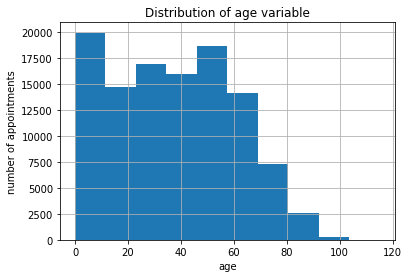

In [40]:
# create a histogram for age variable
df.age.hist()
plt.legend()
plt.title('Distribution of age variable')
plt.ylabel('number of appointments')
plt.xlabel('age')
pd.DataFrame(df['lead_time'].describe())

-The younger patients seem to make the majority of the sample under study.

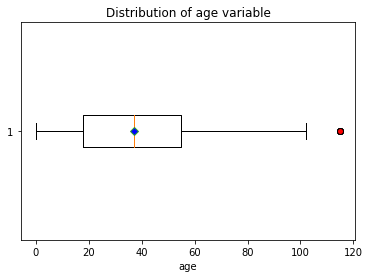

In [41]:
# creating a box plot for age variable
# adding the mean to the boxplot
red_mark = dict(markerfacecolor='red', marker='o')
mean_mark = dict(markerfacecolor='blue', marker='D')

# box plot for age variable
plt.boxplot(x=df['age'], vert=False, flierprops=red_mark, 
            showmeans=True, meanprops=mean_mark)
plt.legend()
plt.title('Distribution of age variable')
plt.xlabel('age');

-Very few outliers are present in the age variable.
-The mean of age is virtually equal to the median at 37 years.

In [42]:
# returning the statistical summary of "age" column
df.describe().age

count    110517.000000
mean         37.089778
std          23.110062
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

-50% of patients in the dataset are between 18 and 55 years old.

In [43]:
# counts of the unique values in the 'no_show' column
df['no_show'].value_counts()

0    88203
1    22314
Name: no_show, dtype: int64

In [44]:
showed.mean()

0.7980944108146258

In [45]:
missed.mean()

0.20190558918537418

-The majority of patients in the dataset showed up for their appointments.
-About 80% of patients in the dataset showed up at their appointment day, while nearly 20% missed their appointments

In [46]:
#Calculate the average age of patients who showed up
df.age[showed].mean()

37.79102751607088

In [47]:
#Calculate the average age of patients who missed
df.age[missed].mean()

34.31787218786412

-The average age of patients who showed up is higher than the average age of patients who missed. In addition, the average age of patients who missed (34 years) is lower than the overall average age of patients (37 years).

,age
count,110517.000000
mean,37.089778
std,23.110062
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


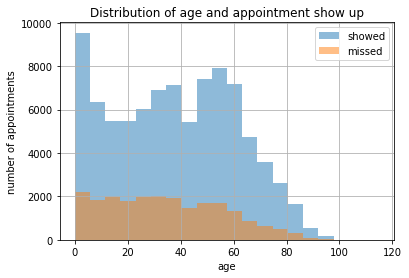

In [48]:
#Displaying the distribution of the age of patients and show/no-show appointments
df.age[showed].hist(alpha=0.5, bins=20, label='showed')
df.age[missed].hist(alpha=0.5, bins=20, label='missed')
plt.legend()
plt.title('Distribution of age and appointment show up')
plt.xlabel('age')
plt.ylabel('number of appointments')
pd.DataFrame(df['age'].describe())

-The patients' show up for their scheduled appointments is largest in very young patients (around 0-6 years old). This might be due to the fact that very young patients require care and commuting from their parents whom are vigilant to the medical appointments of their young children.
-The miss rate of appointments is relatively higher in mid-to-old ages, perhaps due to unforeseen work and life committments of patients in this age bracket that might cause them to miss appointments.

In [49]:
# segmenting the age column into age_brackets
df.loc[df['age'].between(0,16), 'age_brackets'] = 'children'
df.loc[df['age'].between(17,40), 'age_brackets'] = 'young_employees'
df.loc[df['age'].between(40,65), 'age_brackets'] = 'older_employees'
df.loc[df['age']>65, 'age_brackets'] = 'pensioners'

-We try to gain a more in-depth view of the age variable by segmenting patients by age brackets to guage whether each age bracket has different characteristics. 

In [50]:
# counting unique values in the "age_brackets" column
df.age_brackets.value_counts()

older_employees    37943
young_employees    33407
children           25867
pensioners         13300
Name: age_brackets, dtype: int64

age_brackets
children           0.216492
older_employees    0.180060
pensioners         0.155263
young_employees    0.233993
Name: no_show, dtype: float64

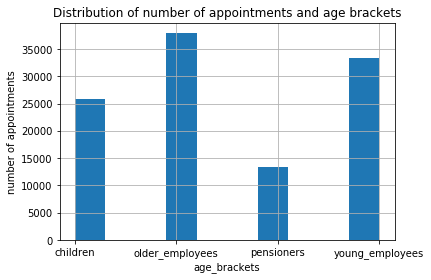

In [51]:
# create histogram for age_brackets
df.age_brackets.hist()
plt.legend()
plt.title('Distribution of number of appointments and age brackets')
plt.xlabel('age_brackets')
plt.ylabel('number of appointments')
df.groupby('age_brackets')["no_show"].mean()

-As can be seen from the value_counts() function and the accompanying histogram above, the largest age bracket for the patients is the age group older employees (40-65 years), followed by young employees (17-40 years), followed by children (0-16 years), and finally pensioners (patients whom are above 65 years old)

age_brackets
children           0.216492
older_employees    0.180060
pensioners         0.155263
young_employees    0.233993
Name: no_show, dtype: float64

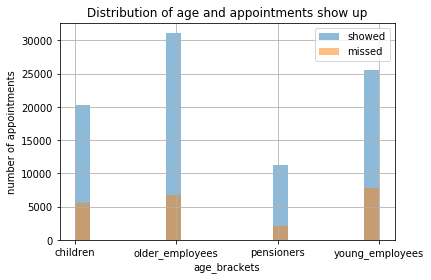

In [52]:
#Displaying the distribution of the age of patients and corresponding show/no-show data
df.age_brackets[showed].hist(alpha=0.5, bins=20, label='showed')
df.age_brackets[missed].hist(alpha=0.5, bins=20, label='missed')
plt.legend()
plt.title('Distribution of age and appointments show up')
plt.xlabel('age_brackets')
plt.ylabel('number of appointments')
df.groupby('age_brackets')["no_show"].mean()

-older_employees and pensioners seem to have a relatively lower no-show rate than children and young_employees.
-Bearing in mind that we calculated the average no-show rate for all patients in the dataset earlier in this section of the report at about 20%. The age brackets had varying no-show rates ; pensioners ~15%, older_employees ~18%, children: ~22% and finally young_employees 23%. Hence 2 subgroups of the 'age' variable (pensioners and older_employees) had no-show rates below the overall average no-show rate of 20%, while the remaining 2 subgroups (children and young_employees) had above average no-show rates.

In [53]:
#Counting the number of show/no-show patients for each age category
df.groupby(['age_brackets', 'no_show'])['no_show'].count()

age_brackets     no_show
children         0          20267
                 1           5600
older_employees  0          31111
                 1           6832
pensioners       0          11235
                 1           2065
young_employees  0          25590
                 1           7817
Name: no_show, dtype: int64

,lead_time
count,110517.000000
mean,10.184596
std,15.255365
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


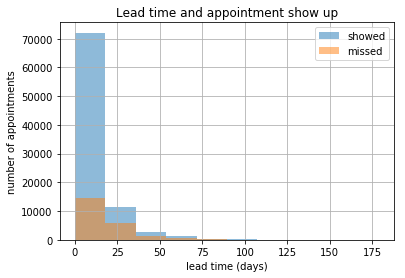

In [54]:
#Displaying the distribution of the lead_time of appointments
df.lead_time[showed].hist(alpha=0.5, bins=10, label='showed')
df.lead_time[missed].hist(alpha=0.5, bins=10, label='missed')
plt.legend()
plt.title('Lead time and appointment show up')
plt.xlabel('lead time (days)')
plt.ylabel('number of appointments')
pd.DataFrame(df['lead_time'].describe())

-There appears to be a relationship between patients' show/no-show rates and lead time (the number of days between schedule day and appointment day). Patients with lower lead times appear to have missed less appointments than patients with longer lead times. Perhaps it would be useful if we dig deeper in the details of the lead time by segmenting it against the show/no-show rates as follows.

In [55]:
# segmenting lead_time into time_intervals
df.loc[df['lead_time']==0, 'time_intervals'] = 'same_day'
df.loc[df['lead_time'].between(1,7), 'time_intervals'] = '1_week'
df.loc[df['lead_time'].between(8,15), 'time_intervals'] = '2_weeks'
df.loc[df['lead_time'].between(16,23), 'time_intervals'] = '3_weeks'
df.loc[df['lead_time'].between(24,30), 'time_intervals'] = '4_weeks'
df.loc[df['lead_time']>30, 'time_intervals'] = '>_4_weeks'

-We try to gain a more in-depth view of the lead_time variable by segmenting lead_time by time interval brackets to guage whether each time bracket has different characteristics.

In [56]:
# return the day names for the week from the "appointmentday" column
df['day'] = df['appointmentday'].dt.day_name()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,...,handicap,sms_received,no_show,patientid_integer,reschedule_or_two_appointments,two_appointments,lead_time,age_brackets,time_intervals,day
0,29872499824296.0,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,0,0,True,1,0,0,older_employees,same_day,Friday
1,558997776694438.0,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,0,0,True,1,0,0,older_employees,same_day,Friday
2,4262962299951.0,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,0,0,True,1,0,0,older_employees,same_day,Friday
3,867951213174.0,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,0,0,True,0,0,0,children,same_day,Friday
4,8841186448183.0,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,0,0,True,0,0,0,older_employees,same_day,Friday


-Extracting days of the week by name for more convenience in display.

In [57]:
# counting unique values of day
df['day'].value_counts()

Wednesday    25864
Tuesday      25638
Monday       22713
Friday       19017
Thursday     17246
Saturday        39
Name: day, dtype: int64

-Wednesdays and Tuesdays are the busiest days, while Saturdays might be dedicated to emergencies.

/opt/conda/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


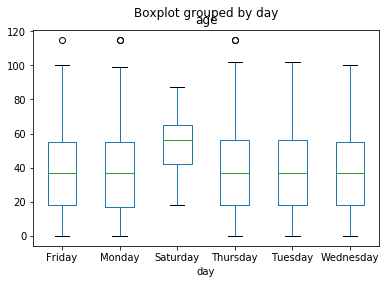

In [58]:
#Boxplot of days of the week with respect to age
df.boxplot(by ='day', column =['age'], grid = False);

-Apart from the outlier day of Saturday, there appears to be no age preference for any week day, as the age median is visibly the same throughout the days of the week.
-The significantly higher median age for Saturday might be explained by the emergency appointments for senior citizens requiring urgent medical care.

day
Friday       0.212284
Monday       0.206446
Saturday     0.230769
Thursday     0.193494
Tuesday      0.200874
Wednesday    0.196876
Name: no_show, dtype: float64

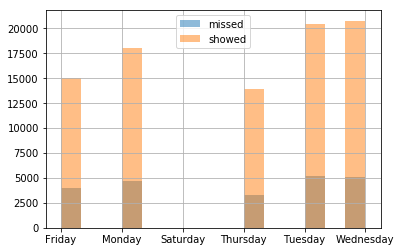

In [59]:
# create histogram for days of the week and show / no-show 
df.day[missed].hist(alpha=0.5, bins=15, label='missed')
df.day[showed].hist(alpha=0.5, bins=15, label='showed')
plt.legend()
df.groupby('day')["no_show"].mean()

-Saturdays and Fridays relatively exhibit the largest no-show rates.

day
Friday       37
Monday       37
Saturday     56
Thursday     37
Tuesday      37
Wednesday    37
Name: age, dtype: int64

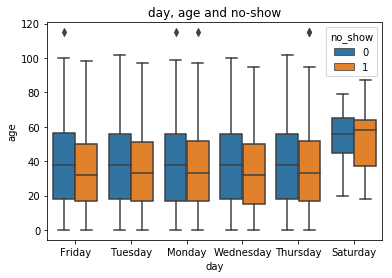

In [60]:
# creating boxplot for age and day of the week against show / no-show
sns.boxplot(x = df['day'],
            y = df['age'],
            hue = df['no_show'])
plt.title('day, age and no-show')
plt.xlabel('day')
plt.ylabel('age')
df.groupby('day')["age"].median()

-Median age of no-show patients is nearly identical (37 years) for all days of the week, apart from the Saturday outlier.

scholarship
0    38
1    31
Name: age, dtype: int64

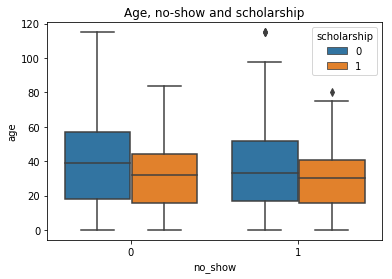

In [61]:
sns.boxplot(x = df['no_show'],
            y = df['age'],
            hue = df['scholarship'])
plt.title('Age, no-show and scholarship')
plt.xlabel('no_show')
plt.ylabel('age')
df.groupby('scholarship')["age"].median()

-The median ages of the enrolled patients in the welfare program is lower than those not enrolled.
-Apparently no effect of age and scholarship on the show / no-show rate of appointments.

handicap
0    37.0
1    52.5
2    44.0
3    64.0
4    15.0
Name: age, dtype: float64

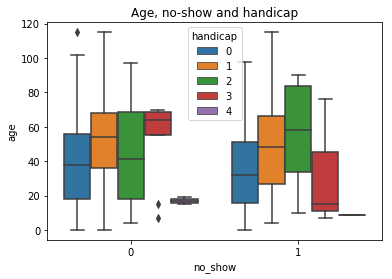

In [62]:
# creating box plot of age vs no_show, given handicap
sns.boxplot(x = df['no_show'],
            y = df['age'],
            hue = df['handicap'])

plt.title('Age, no-show and handicap')
plt.xlabel('no_show')
plt.ylabel('age')
df.groupby('handicap')["age"].median()

-Tentatively, we are ruling out any effect that age and the day of the week has on the show/no-show rate, as the distribution appears uniform across all days of the week (apart from the Saturday outlier). The boxplot stresses that the no-show patients have a lower median age than those who showed up.

hypertension
0    30
1    61
Name: age, dtype: int64

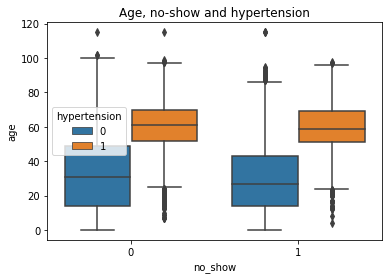

In [63]:
sns.boxplot(x = df['no_show'],
            y = df['age'],
            hue = df['hypertension'])
plt.title('Age, no-show and hypertension')
plt.xlabel('no_show')
plt.ylabel('age')
df.groupby('hypertension')["age"].median()

-A higher median age for patients diagnosed with hypertension is calculated as might be expected.
-Apparently no effect of age and hypertension on the show / no-show rate of appointments.

diabetes
0    34
1    62
Name: age, dtype: int64

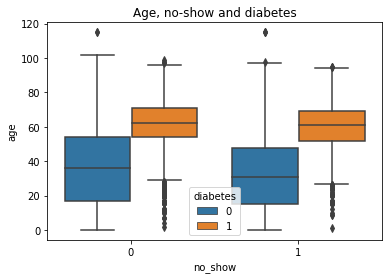

In [64]:
sns.boxplot(x = df['no_show'],
            y = df['age'],
            hue = df['diabetes'])
plt.title('Age, no-show and diabetes')
plt.xlabel('no_show')
plt.ylabel('age')
df.groupby('diabetes')["age"].median()

-A higher median age for patients diagnosed with diabetes is calculated as might be expected.
-Apparently no effect of age and diabetes on the show / no-show rate of appointments.

alcoholism
0    36
1    50
Name: age, dtype: int64

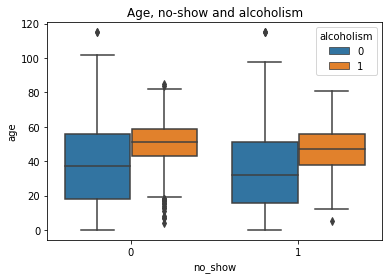

In [65]:
sns.boxplot(x = df['no_show'],
            y = df['age'],
            hue = df['alcoholism'])
plt.title('Age, no-show and alcoholism')
plt.xlabel('no_show')
plt.ylabel('age')
df.groupby('alcoholism')["age"].median()

-A higher median age for patients diagnosed with alcoholism is calculated as might be expected.
-Apparently no effect of age and alcoholism on the show / no-show rate of appointments.

### Research Question 2  Does the gender affect the show up rate for the appointments?

,patientid
gender,
F,71834
M,38683


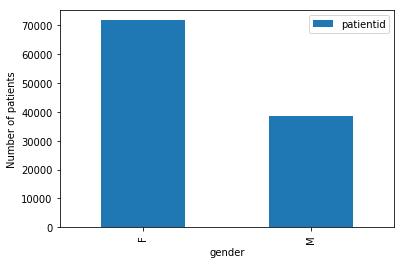

In [66]:
df.groupby(['gender'])[['patientid']].count().plot(kind='bar').set_ylabel('Number of patients')
df.groupby(['gender'])[['patientid']].count()

-The number of female patients is significantly higher than that of male patients.

,no_show
gender,
F,0.203121
M,0.199648


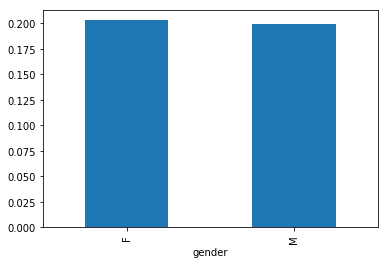

In [67]:
# calculating no-show mean for gender
df.groupby('gender').no_show.mean().plot(kind= 'bar')
df.groupby(['gender'])[['no_show']].mean()

-Female patients have a slightly higher chance of missing appointments.

,no_show
gender,
F,0.203121
M,0.199648


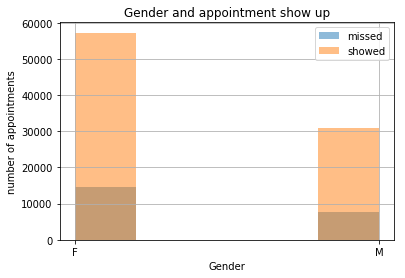

In [68]:
df.gender[missed].hist(alpha=0.5, bins=5, label='missed')
df.gender[showed].hist(alpha=0.5, bins=5, label='showed')
plt.legend()
plt.title('Gender and appointment show up')
plt.xlabel('Gender')
plt.ylabel('number of appointments')
df.groupby(['gender'])[['no_show']].mean()

-A marginally higher no-show rate for female patients is calculated.

,scholarship
gender,
F,0.123242
M,0.051909


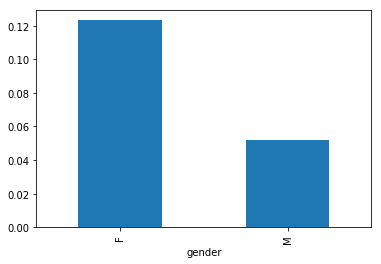

In [69]:
# calculating mean for gender with scholarship
df.groupby('gender').scholarship.mean().plot(kind= 'bar')
df.groupby(['gender'])[['scholarship']].mean()

-The number of female patients enrolled in the welfare program is significantly larger than their male counterparts, more than double.

In [70]:
# calculating show and no-show mean for gender with scholarship
df.groupby(['gender', 'scholarship', 'no_show'])['no_show'].count()

gender  scholarship  no_show
F       0            0          50496
                     1          12485
        1            0           6747
                     1           2106
M       0            0          29424
                     1           7251
        1            0           1536
                     1            472
Name: no_show, dtype: int64

-The mean no-show for female patients enrolled in the welfare program is ~0.24, which is virtually the same as that of no-show male patients enrolled in the welfare program

sms_received
0    0.166987
1    0.275753
Name: no_show, dtype: float64

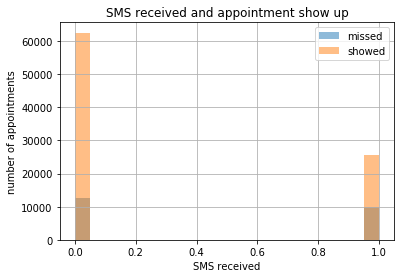

In [71]:
df.sms_received[missed].hist(alpha=0.5, bins=20, label='missed')
df.sms_received[showed].hist(alpha=0.5, bins=20, label='showed')
plt.legend()
plt.title('SMS received and appointment show up')
plt.xlabel('SMS received')
plt.ylabel('number of appointments')
df.groupby('sms_received')["no_show"].mean()

-A possible anamoly is detected in the show / no-show rate of appointments preceded by an SMS confirmation message sent to the patient beforehand. Intuitively, we would think that the SMS confirmation would enhance the show rate for appointments, however the opposite is true, as the no-show rate for patients receiving an SMS is significantly higher than those patients not receving an SMS.

In [72]:
# calculating show and no-show mean for gender receiving SMS
df.groupby(['gender', 'sms_received', 'no_show'])['no_show'].count()

gender  sms_received  no_show
F       0             0          39762
                      1           7871
        1             0          17481
                      1           6720
M       0             0          22744
                      1           4659
        1             0           8216
                      1           3064
Name: no_show, dtype: int64

-The mean no-show for female patients whom has received a confirmation SMS  is ~0.28, higher than the mean of ~.28 of the no-show male patients whom has received a confirmation SMS.

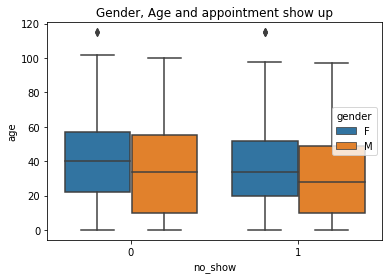

In [73]:
sns.boxplot(x = df['no_show'],
            y = df['age'],
            hue = df['gender'])
plt.title('Gender, Age and appointment show up')
plt.xlabel('no_show')
plt.ylabel('age');

-For the show and no-show appointments, the ages of the male patients exhibit a consistently larger interquartile range and a lower median age when compared to their female counterparts.

### Research Question 3  Does the time period between scheduling an appointment and actual appointment day (lead time) affect the patients' show/no-show rate?


,lead_time
count,110517.000000
mean,10.184596
std,15.255365
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


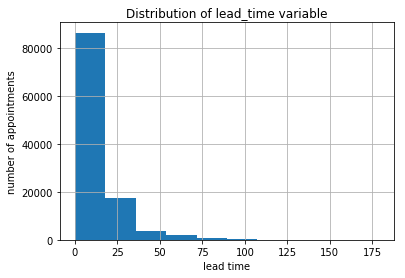

In [74]:
df.lead_time.hist()
plt.legend()
plt.title('Distribution of lead_time variable')
plt.ylabel('number of appointments')
plt.xlabel('lead time')
pd.DataFrame(df['lead_time'].describe())

-The data is skewed to the right.
-Lower lead times shape the majority of the observations.

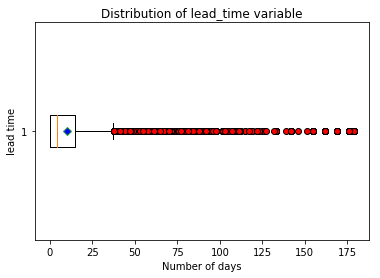

In [75]:
# box plot for lead_time variable
plt.boxplot(x=df['lead_time'], vert=False, flierprops=red_mark, 
            showmeans=True, meanprops=mean_mark)
plt.legend()
plt.title('Distribution of lead_time variable')
plt.xlabel('Number of days')
plt.ylabel('lead time');

-A considerable number of outliers are present in the lead_time variable.
-There is a concentration of data towards the shorter lead times, with the longer lead times being the outliers.

In [76]:
# returning the statistical summary of "lead_time" column
df.describe().lead_time

count    110517.000000
mean         10.184596
std          15.255365
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time, dtype: float64

-50% of observations lie between the 0-15 days.
-The mean lead time (time between scheduling an appointment and actual appointment date) is about 10 days,

In [77]:
#Calculate the average lead time of patients who showed up
df.lead_time[showed].mean()

8.755008333049897

In [78]:
#Calculate the average lead time of patients who missed
df.lead_time[missed].mean()

15.835484449224701

-The mean lead time is noteably higher for patients who missed their appointments, registering around 16 days, versus a mean lead time of around 9 days for the showed up patients.

In [79]:
#Calculate the median lead time for all appointments
df.lead_time.median()

4.0

-There is a considerable number of outliers, so let us test another measure for central tendency which is the median. 
-The median of the overall patients' lead time is 4 days (versus a mean of 10 days)

In [80]:
#Calculate the median lead time of showed up appointments
df.lead_time[showed].median()

2.0

In [81]:
#Calculate the median lead time of missed appointments
df.lead_time[missed].median()

11.0

-The median seems to provide a better picture about the lead time, virtue of the presence of a large number of outliers. The discrepancy between the median of no-show patients (11 days) versus showed patients (2 days) is now a bit more elaborate.

,lead_time
count,110517.000000
mean,10.184596
std,15.255365
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


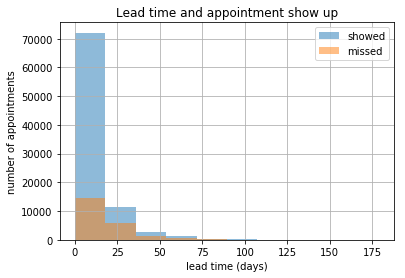

In [82]:
#Displaying the distribution of the lead_time of appointments
df.lead_time[showed].hist(alpha=0.5, bins=10, label='showed')
df.lead_time[missed].hist(alpha=0.5, bins=10, label='missed')
plt.legend()
plt.title('Lead time and appointment show up')
plt.xlabel('lead time (days)')
plt.ylabel('number of appointments')
pd.DataFrame(df['lead_time'].describe())

-The lead time distribution is very skewed to the right, and noteabe is that the majority of appointments roughly fall in the 0-15 days time bracket. The longer the waiting time between schedule day and appointment day, the diminishing the number of appointments. With regards to the show/no-show rate, it is clear from the chart that the show rate is highest among the lower lead time bracket, and that the no-show rate increases significantly in the next time bracket of roughly about 15-30 days. At this stage, we can cautiously conclude that it appears that the recently booked appointments have a higher chance of patients' show up than older appointments

time_intervals  no_show
1_week          0          24410
                1           7772
2_weeks         0           9362
                1           4166
3_weeks         0           6327
                1           3039
4_weeks         0           4382
                1           2120
>_4_weeks       0           6953
                1           3425
same_day        0          36769
                1           1792
Name: no_show, dtype: int64

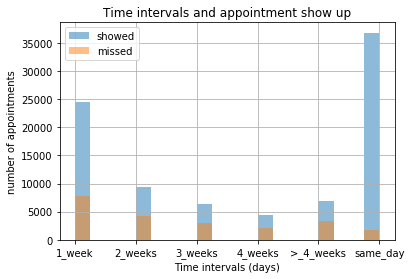

In [83]:
#Displaying the distribution of the time_intervals of appointments and show rates
df.time_intervals[showed].hist(alpha=0.5, bins=20, label='showed')
df.time_intervals[missed].hist(alpha=0.5, bins=20, label='missed')
plt.legend()
plt.title('Time intervals and appointment show up')
plt.xlabel('Time intervals (days)')
plt.ylabel('number of appointments')
df.groupby(['time_intervals', 'no_show'])['no_show'].count()

-same day appointments had the highest number of appointments and noticeably the lowest no-show rate.

,no_show
time_intervals,
1_week,0.241501
2_weeks,0.307954
3_weeks,0.324471
4_weeks,0.326054
>_4_weeks,0.330025
same_day,0.046472


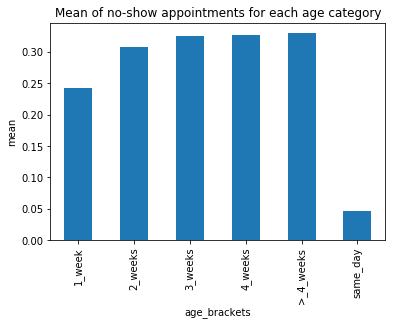

In [84]:
#displaying the mean of no-show appointments for each time interval
df.groupby('time_intervals').no_show.mean().plot(kind= 'bar')
plt.title('Mean of no-show appointments for each age category')
plt.xlabel('age_brackets')
plt.ylabel('mean')
df.groupby(['time_intervals'])[['no_show']].mean()

-Bearing in mind that we calculated the average no-show rate for all appointments in the dataset earlier in this section of the report at about 20%. The age brackets had varying no-show rates ; same_day ~5%, one_week ~24%, two_weeks: ~31%, three_weeks ~32%, four_weeks ~33% and finally >_four_weeks 33%. Hence one subgroup of the 'time_intervals' variable (same_day) had no-show rates well below the overall average no-show rate of 20%, while all the remaining 5 subgroups had above average no-show rates.

two_appointments
0    0.198558
1    0.340360
Name: no_show, dtype: float64

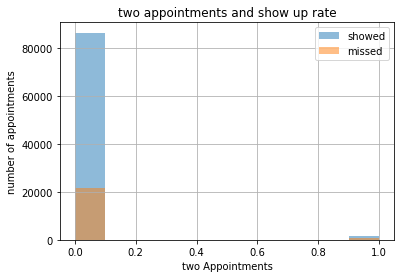

In [85]:
#Displaying the distribution of the patients with 2 appointments and show up rate
df.two_appointments[showed].hist(alpha=0.5, bins=10, label='showed')
df.two_appointments[missed].hist(alpha=0.5, bins=10, label='missed')
plt.legend()
plt.title('two appointments and show up rate')
plt.xlabel('two Appointments')
plt.ylabel('number of appointments')
df.groupby('two_appointments')["no_show"].mean()

-'two_appointments' represents the same patient ID being assigned 2 appointment IDs at the same schedule day and during the same schedule call.
-A rather high appointment miss rate of ~34% is calculated for the "two_appointments".

In [86]:
# counting the number of show/no-show appointments for patients with two appointments
df.groupby(['two_appointments', 'no_show'])['no_show'].count()

two_appointments  no_show
0                 0          86482
                  1          21426
1                 0           1721
                  1            888
Name: no_show, dtype: int64

time_intervals
1_week       43
2_weeks      34
3_weeks      36
4_weeks      35
>_4_weeks    39
same_day     34
Name: age, dtype: int64

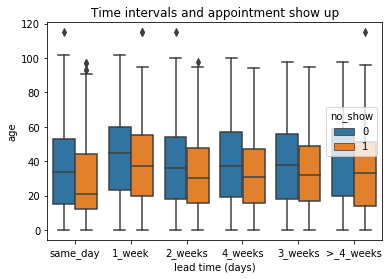

In [87]:
#the distribution of ‘time intervals’ vs ‘age’ on the basis of if a patient showed up or not 
sns.boxplot(x = df['time_intervals'],
            y = df['age'],
            hue = df['no_show'])
plt.title('Time intervals and appointment show up')
plt.xlabel('lead time (days)')
plt.ylabel('age')
df.groupby('time_intervals')["age"].median()

--No-show patients fo the same_day interval noteably have the lowest median age compared to all other time intervals. 

sms_received
0     0
1    14
Name: lead_time, dtype: int64

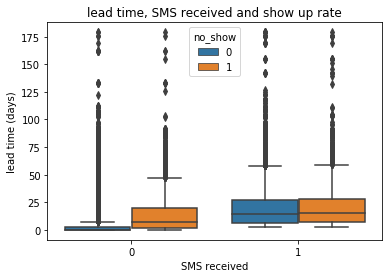

In [88]:
#the distribution of ‘lead_time’ vs ‘SMS_received’ group on the basis of if a patient showed up or not 
sns.boxplot(x = df['sms_received'],
            y = df['lead_time'],
            hue = df['no_show'])
plt.title('lead time, SMS received and show up rate')
plt.xlabel('SMS received')
plt.ylabel('lead time (days)')
df.groupby('sms_received')["lead_time"].median()

-The patients who managed to make it to their apppointment day did not receive an SMS message from the hospital, but this might be explained to an extent by the lower lead time for such patients (a great chunk were same day appointments). 

<a id='conclusions'></a>
## Conclusions
We have done our best throughout the analysis presented in the sections of this report to maintain an objective stance regarding our findings, without jumping into conclusions regarding the causality or correlation between the variables under study. We humbly maintain a tentative position regarding all the opinions presented in this report, as more supporting evidence and deeper insight are needed to formulate a more solid opinion about the findings backed by more detailed data analysis.

For our purposes, we have done our best to address the research questions presented in the introduction section as follows:
1- Does the age of a patient affect his / her ability to show up for a medical appointment? We have initial supporting evidence to suggest that the age brackets had varying no-show rates ; pensioners ~15%, older_employees ~18%, children: ~22% and finally young_employees 23%. Hence 2 subgroups of the 'age' variable (pensioners and older_employees) had no-show rates below the overall average no-show rate of 20%, while the remaining 2 subgroups (children and young_employees) had above average no-show rates.
2- Does gender affect the no-show rate of patients?: Not really, although females have a slightly higher appointments miss rate than their male counterparts. Additional variables of scholarship and confirmation SMS where tested, and no significantly varying patterns were detected between male and female patients. 
3- Lead time: tentatively, the longer the lead time (the time interval between schedule day and appointment day), the more likely patients miss appointments.

Report limitations:
In addition to asserting the tentative nature of the findings provided in the study, there are a number of limitations that we have encountered throughout our data analysis exercise:
-The findings and conclusions drawn in this project are totaly a function of the authenticity of the available data on the medical appointments show / no-show rates, and some data definitions and clarifications are needed, such as the "HandCap" column, which is originally defined by the dataset creator as binary, and was later redefined as an "int" column assuming values from 0 to 4.
-There were a number of patient cases described as being diagnosed with alcoholism despite their young ages. The verification of such cases would be very beneficial to the integrity of the dataset.
-In our analysis of the dataset, we have encountered a number of patients with the following common attribute: the same patient ID being assigned 2 appointment IDs at the same schedule day and during the same schedule call. Worthy to mention is that this category of patients had a no-show rate of about 34%, well above the overall average of 20%. We have thought of the possible reasonable explanations for such attribute, and have tentatively concluded that the patient booked 2 appointments with two different doctors for the same day during the scheduling call. What strengthens our belief that this might be the case is the absence of the time component in the "AppointmentDay" column, which might be different for the 2 appointment IDs issued for the same patient. We re-assert that this conclusion could be accurate or inaccurate, but to the best of our knowledge and analysis, this seems to be the most likely explanation. However, it remains a tentative conclusion till further confirmation.
-During our analysis of the relationship between SMS received by patients and their show up rate, an anomoly behavior was detected. The patients who received confirmation SMS had lower show rates than the patients who did not receive SMS. Further study of the causes of such behavior pattern is advocated.
-While a fair amount of trends and relationships between the variables under study were detected, and acknowledging the tentative nature of such findings, applying more statistical measures such as correlation and regression could provide reasonable enforcement to the initial findings reached in the current stage.
-For the sake of of a more comprehensive view of the factors affecting the show up rate, it might be prudent to add to our study other variables that could have a toll on the show up rate, such as i)the weather condition (namely rain) on the appointment day, ii)whether the appointment is a first visit or a follow up visit,i) and iii)whether there was a national holiday on the appointment day. For instance, a patient performing a periodical routine checkup or a recovered patient from a mild illness conducting a followup appointment might consider dropping the appointment on a rainy day or if the appointment coincided with a national holiday. 
-Finally, the dataset of the sample appointments covers the period from April 29th to June 8th for the year 2016, which corresponds to the fall/winter season. Acknowledging that healthcare is a defensive sector, yet there remains a possibility that patients' behavior in spring/summertime might be different from their behavior during the period which is covered by the dataset. We believe it would add a flavor to the research to include months from the spring/summertime to the dataset under research and to normalize any possibilities of seasonality in the analysis.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [89]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0